



# Fruit and Vegetable Classification

### Intro : Model will classify images into 36 types from fruits and vegetables to  facilitate product knowledge for the young age group that cannot distinguish between types


Having 3861 images of 36 different fruits/vegetables

![fruit vegetable](https://i.imgur.com/KUAcIQD.jpeg)

<h1>Table of contents</h1>
 

<ul>
<li><a href="#1"><strong>1. Loading and preprocessing</strong></a>
</ul>
    
<ul>
<li><a href="#2"><strong>2. Load the Images with a generator and Data Augmentation</strong></a>
</ul>

<ul>
<li><a href="#3"><strong>3. Train the model</strong></a>
</ul>

<ul>
<li><a href="#4"><strong>4. Check up the result</strong></a>
</ul>


# Context

This dataset contains images of the following food items:

- **fruits**: banana, apple, pear, grapes, orange, kiwi, watermelon, pomegranate, pineapple, mango
- **vegetables**: cucumber, carrot, capsicum, onion, potato, lemon, tomato, raddish, beetroot, cabbage, lettuce, spinach, soy bean, cauliflower, bell pepper, chilli pepper, turnip, corn, sweetcorn, sweet potato, paprika, jalepeño, ginger, garlic, peas, eggplant

# Content
This dataset contains three folders:

- train (100 images each)
- test (10 images each)
- validation (10 images each)
each of the above folders contains subfolders for different fruits and vegetables 






# 1. Loading and preprocessing<a class="anchor" id="1"></a><a class="anchor" id="1"></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Activation, Dropout, BatchNormalization, Flatten, Dense,AveragePooling2D
from tensorflow.keras.preprocessing import image
from keras.callbacks import  ReduceLROnPlateau ,EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
# Create a list with the filepaths for training and testing
train_dir = Path('../input/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('../input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('../input/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))


In [3]:
#Create a DataFrame with the filepath and the labels of the pictures
def proc_img(filepath):

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df



In [4]:
train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

In [5]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['raddish' 'cabbage' 'pear' 'spinach' 'pineapple' 'mango' 'onion'
 'bell pepper' 'peas' 'capsicum' 'ginger' 'watermelon' 'cauliflower'
 'banana' 'lettuce' 'cucumber' 'corn' 'sweetpotato' 'eggplant' 'tomato'
 'turnip' 'grapes' 'garlic' 'soy beans' 'sweetcorn' 'beetroot'
 'pomegranate' 'paprika' 'apple' 'carrot' 'jalepeno' 'potato' 'kiwi'
 'orange' 'lemon' 'chilli pepper']


In [6]:
print('-- Testing set --\n')
print(f'Number of pictures: {test_df.shape[0]}\n')
print(f'Number of different labels: {len(test_df.Label.unique())}\n')
print(f'Labels: {test_df.Label.unique()}')

-- Testing set --

Number of pictures: 334

Number of different labels: 36

Labels: ['tomato' 'paprika' 'ginger' 'garlic' 'eggplant' 'peas' 'cauliflower'
 'banana' 'capsicum' 'turnip' 'carrot' 'orange' 'mango' 'spinach'
 'soy beans' 'potato' 'apple' 'sweetcorn' 'watermelon' 'chilli pepper'
 'pear' 'bell pepper' 'cabbage' 'pomegranate' 'pineapple' 'jalepeno'
 'raddish' 'cucumber' 'beetroot' 'corn' 'kiwi' 'grapes' 'onion'
 'sweetpotato' 'lettuce' 'lemon']


In [7]:
print('-- Validation set --\n')
print(f'Number of pictures: {val_df.shape[0]}\n')
print(f'Number of different labels: {len(val_df.Label.unique())}\n')
print(f'Labels: {val_df.Label.unique()}')

-- Validation set --

Number of pictures: 334

Number of different labels: 36

Labels: ['carrot' 'beetroot' 'sweetpotato' 'cabbage' 'lettuce' 'peas' 'ginger'
 'paprika' 'pomegranate' 'garlic' 'cucumber' 'tomato' 'bell pepper'
 'orange' 'onion' 'jalepeno' 'spinach' 'pear' 'watermelon' 'eggplant'
 'apple' 'pineapple' 'cauliflower' 'raddish' 'turnip' 'soy beans' 'lemon'
 'sweetcorn' 'chilli pepper' 'potato' 'banana' 'kiwi' 'corn' 'mango'
 'capsicum' 'grapes']


In [8]:
# The DataFrame with the filepaths and its labels
train_df.head(5)

,Filepath,Label
0,../input/fruit-and-vegetable-image-recognition...,raddish
1,../input/fruit-and-vegetable-image-recognition...,cabbage
2,../input/fruit-and-vegetable-image-recognition...,pear
3,../input/fruit-and-vegetable-image-recognition...,spinach
4,../input/fruit-and-vegetable-image-recognition...,pineapple


In [9]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()


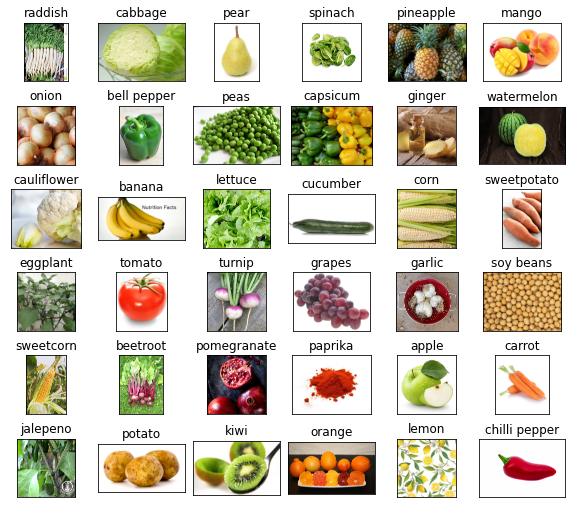

In [10]:
# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

# 2. Load the Images with a generator and Data Augmentation<a class="anchor" id="2"></a>

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2780 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.


In [12]:
# Load the pretained model --> ModileNetV2
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


# 3. Train the model<a class="anchor" id="3"></a>

In [13]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=4) 
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [early, learning_rate_reduction]

In [14]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=10,
    callbacks=callbacks_list
)

Epoch 1/10
 5/87 [>.............................] - ETA: 1:31 - loss: 3.6628 - accuracy: 0.0219

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


87/87 [==============================] - 154s 2s/step - loss: 3.5329 - accuracy: 0.0536 - val_loss: 3.0172 - val_accuracy: 0.3234
Epoch 2/10
87/87 [==============================] - 115s 1s/step - loss: 2.9574 - accuracy: 0.3085 - val_loss: 2.1875 - val_accuracy: 0.6287
Epoch 3/10
87/87 [==============================] - 113s 1s/step - loss: 2.1743 - accuracy: 0.5482 - val_loss: 1.4280 - val_accuracy: 0.7485
Epoch 4/10
87/87 [==============================] - 115s 1s/step - loss: 1.5042 - accuracy: 0.6808 - val_loss: 0.9571 - val_accuracy: 0.8234
Epoch 5/10
87/87 [==============================] - 115s 1s/step - loss: 1.1038 - accuracy: 0.7404 - val_loss: 0.7118 - val_accuracy: 0.8413
Epoch 6/10
87/87 [==============================] - 118s 1s/step - loss: 0.8707 - accuracy: 0.7941 - val_loss: 0.5539 - val_accuracy: 0.8802
Epoch 7/10
87/87 [==============================] - 114s 1s/step - loss: 0.7030 - accuracy: 0.8274 - val_loss: 0.4683 - val_accuracy: 0.8922
Epoch 8/10
87/87 [======

In [15]:
test_accu = model.evaluate(test_images)
print('The testing accuracy of MobileNet is :',test_accu[1]*100, '%')

11/11 [==============================] - 17s 2s/step - loss: 0.3316 - accuracy: 0.9401
The testing accuracy of MobileNet is : 94.0119743347168 %


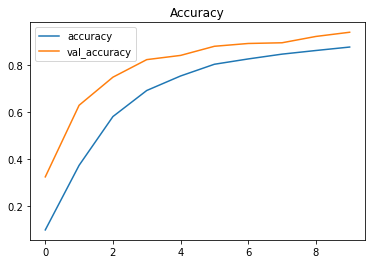

In [16]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

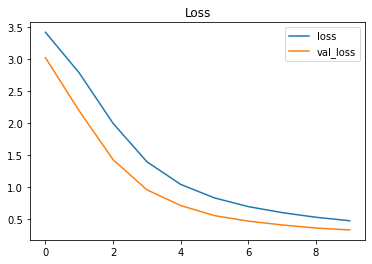

In [17]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

# 4. Check up the result<a class="anchor" id="4"></a>

In [18]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [19]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 94.01%


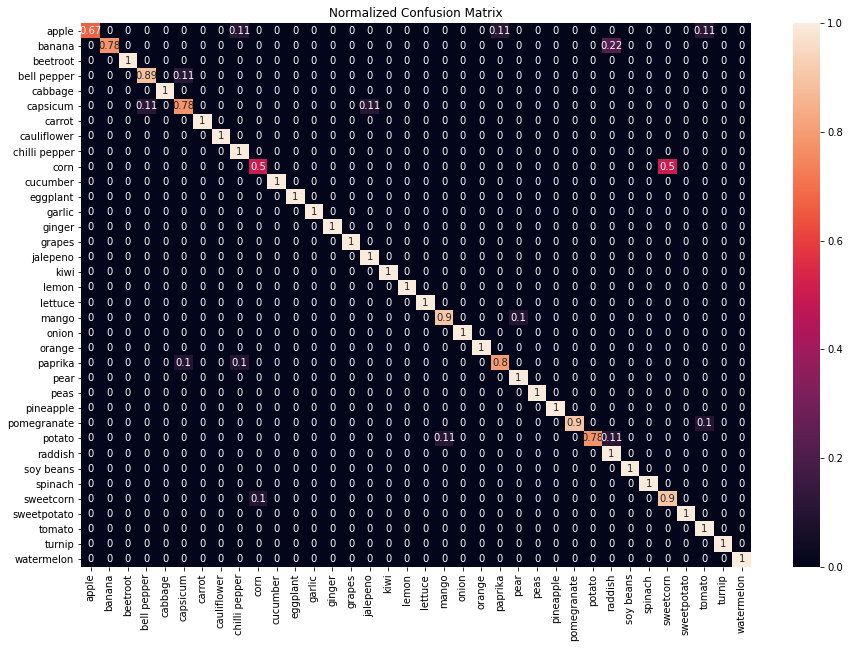

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()

In [2]:
dt={0: 'apple', 1: 'banana', 2: 'beetroot', 3: 'bell pepper', 4: 'cabbage', 5: 'capsicum', 6: 'carrot', 7: 'cauliflower', 8: 'chilli pepper', 9: 'corn', 10: 'cucumber', 11: 'eggplant', 12: 'garlic', 13: 'ginger', 14: 'grapes', 15: 'jalepeno', 16: 'kiwi', 17: 'lemon', 18: 'lettuce', 19: 'mango', 20: 'onion', 21: 'orange', 22: 'paprika', 23: 'pear', 24: 'peas', 25: 'pineapple', 26: 'pomegranate', 27: 'potato', 28: 'raddish', 29: 'soy beans', 30: 'spinach', 31: 'sweetcorn', 32: 'sweetpotato', 33: 'tomato', 34: 'turnip', 35: 'watermelon'}


In [4]:
from keras.models import load_model
model = load_model('model.h5')

In [17]:
import cv2
import numpy as np
#apple2.jpg
#carrot
img = cv2.imread('lemon.jpg')
img = cv2.resize(img,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_arr = tf.keras.preprocessing.image.img_to_array(rgb)
input_arr = np.array([input_arr]) 
input_arr = input_arr.astype('float32') / 255.  
predictions = model.predict(input_arr)
print(np.argmax(predictions,axis=1))
print(dt[np.argmax(predictions,axis=1)[0]])
print(max(max(predictions))*100)

[17]
lemon
64.38388228416443


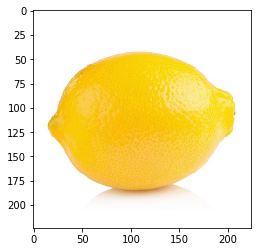

In [18]:

plt.imshow(rgb)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [24]:
#len(model.layers)